In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
A = pd.read_csv(r'C:\Users\Dell\Downloads\Mall_Customers.csv')

In [3]:
A

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = A.iloc[:, [3,4]].values

In [5]:
from sklearn.cluster import KMeans

In [6]:
# Within-Cluster-Sum-of-Squares
wcss = []
for i in range(1, 11):
 kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


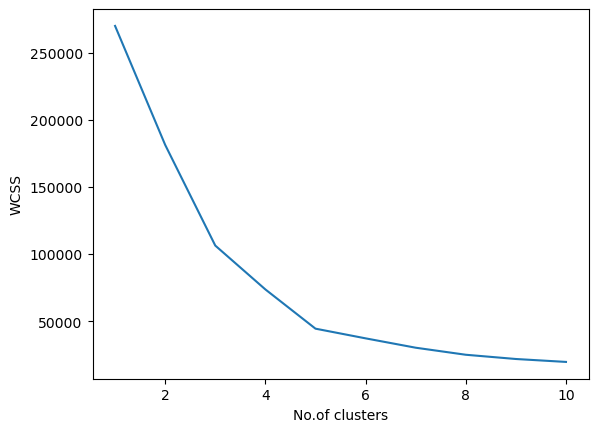

In [7]:
plt.plot(range(1,11),wcss)
plt.xlabel("No.of clusters")
plt.ylabel("WCSS")
plt.show()

In [8]:
y_kmeans = kmeans.fit_predict(X)

In [9]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

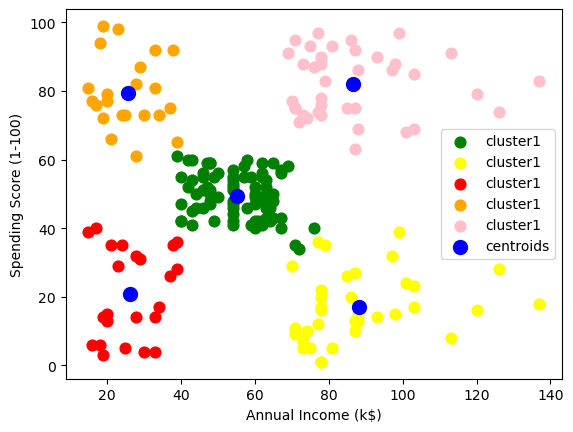

In [10]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=60, c='green', label='cluster1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=60, c='yellow', label='cluster2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=60, c='red', label='cluster3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s=60, c='orange', label='cluster4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s=60, c='pink', label='cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='blue', label='centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()